In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import base64
import numpy as np
import seaborn as sns

from IPython.core.display import display, HTML
from sklearn.cluster import KMeans

In [2]:
plt.style.use(['dark_background'])
plt.suptitle('figure title', color='w')

Text(0.5,0.98,'figure title')

<Figure size 432x288 with 0 Axes>

In [4]:
init_data = pd.read_csv('data/training_values.csv', header=0, sep=',')

### May need to change date type for analysis

In [5]:
init_data['date_recorded'] = pd.to_datetime(init_data['date_recorded'])

In [5]:
print(init_data.dtypes)
print(init_data.head())

id                                int64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                        int64
installer                        object
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                       int64
basin                            object
subvillage                       object
region                           object
region_code                       int64
district_code                     int64
lga                              object
ward                             object
population                        int64
public_meeting                   object
recorded_by                      object
scheme_management                object
scheme_name                      object
permit                           object
construction_year                 int64
extraction_type                  object


##### Code from: https://colab.research.google.com/drive/1QrcuNHJnL3TBzcFV-0yw6y3wWmSWv_gM#scrollTo=b7zs2p2_goJa

In [8]:
#Checking the calculations above
print(init_data['amount_tsh'].count())
print(init_data['amount_tsh'].astype(bool).sum(axis=0))
print(((59400-17761)/59400)*100)

59400
17761
70.09932659932659


# Variable Imputation

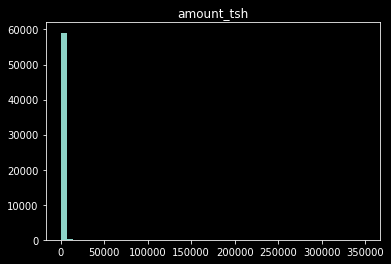

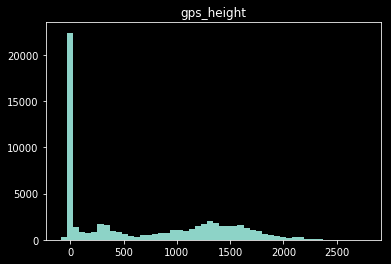

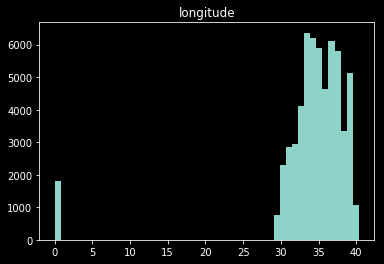

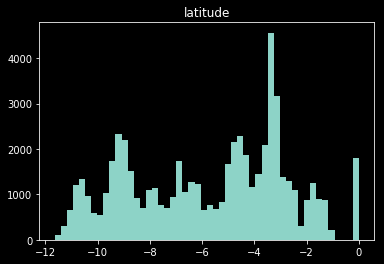

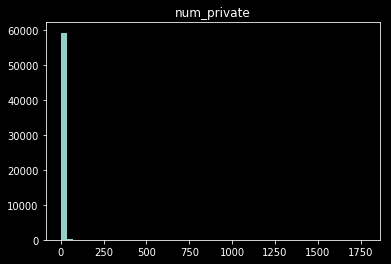

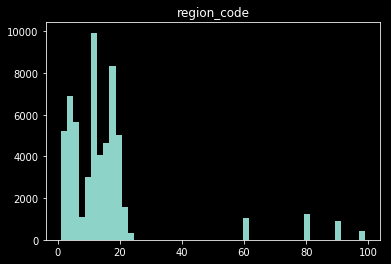

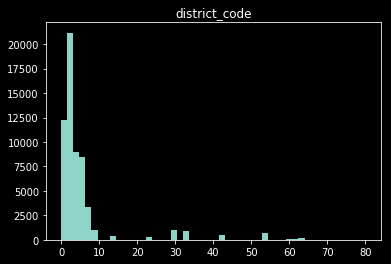

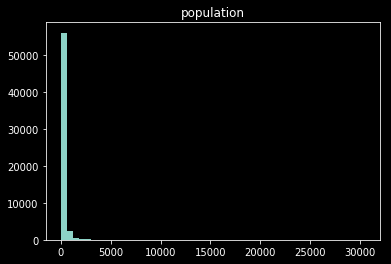

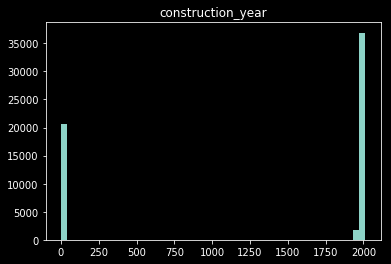

In [9]:
numeric_list = init_data._get_numeric_data()
for i in numeric_list.columns.values:
    if i != 'id':
        plt.title(i)
        plt.hist(numeric_list[i], bins=50)
        plt.show()

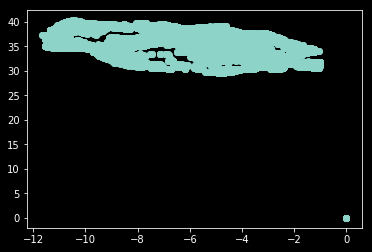

In [6]:
plt.scatter(init_data['latitude'], init_data['longitude'])
plt.show()

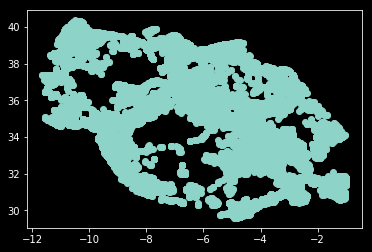

In [7]:
lat_lon_dataframe = init_data[['latitude', 'longitude']].copy()
lat_lon_dataframe = lat_lon_dataframe[lat_lon_dataframe.ne(0).all(axis=1)]
plt.scatter(lat_lon_dataframe['latitude'], lat_lon_dataframe['longitude'])
plt.show()

In [8]:
kmeans_model = KMeans(n_clusters=6, random_state=1).fit(lat_lon_dataframe)
cluster_labels = kmeans_model.predict(lat_lon_dataframe)
lat_lon_dataframe['cluster_values'] = cluster_labels

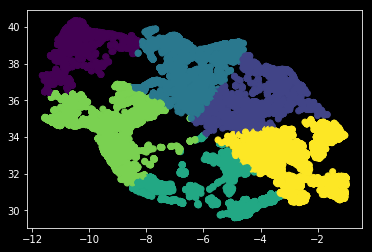

In [9]:
plt.scatter(lat_lon_dataframe['latitude'], lat_lon_dataframe['longitude'], c=lat_lon_dataframe['cluster_values'])
plt.show()

### Remove the 0 longitude rows from the primary dataset and add on the cluster values

In [10]:
cleaned_dataframe = init_data[(init_data[['longitude']] != 0).all(axis=1)].copy()
cleaned_dataframe['region_clusters'] = cluster_labels

In [15]:
print(type(cleaned_dataframe))

<class 'pandas.core.frame.DataFrame'>


Double check the new dataset

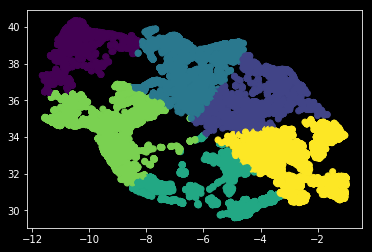

In [11]:
plt.scatter(cleaned_dataframe['latitude'], cleaned_dataframe['longitude'], c=cleaned_dataframe['region_clusters'])
plt.show()

### Check for possible duplicate columns

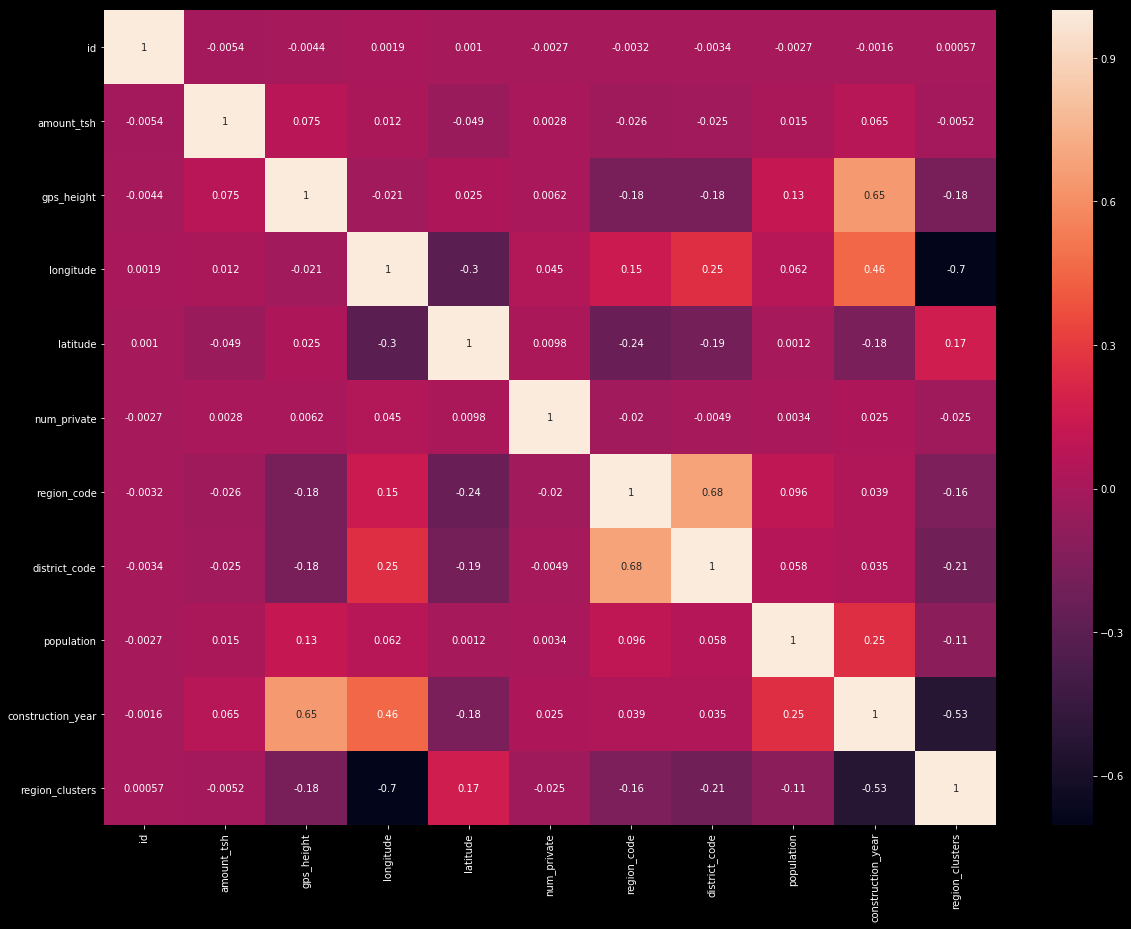

In [18]:
variable_correlation = cleaned_dataframe.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(variable_correlation, xticklabels=variable_correlation.columns, yticklabels=variable_correlation.columns, annot=True)

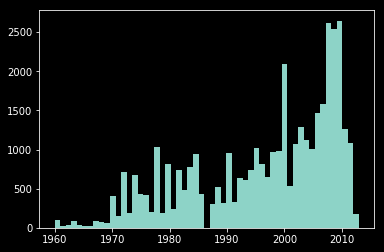

In [17]:
len(np.unique(cleaned_dataframe['construction_year']))
plt.hist(cleaned_dataframe.construction_year[cleaned_dataframe.construction_year != 0], bins=55)
plt.show()

In [22]:
cleaned_dataframe.drop(['num_private', 'scheme_name', 'payment_type', 'quantity_group', 'waterpoint_type_group'], axis=1, inplace=True)

### Save dataframe for reference

In [23]:
cleaned_dataframe.to_csv("data/cleaned_dataframe.csv", sep=",", header=True)